# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import probplot
from sklearn import preprocessing 
import statsmodels.api as sm 

***

## Q1 Delivery Time

In [2]:
df1=pd.read_csv("delivery_time.csv")
df1.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df1.shape

(21, 2)

In [4]:
df1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Heat Map

<AxesSubplot:>

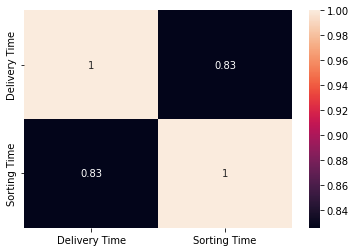

In [12]:
sns.heatmap(df1.corr(),annot=True)

Text(0.5, 1.0, 'Heat_Map')

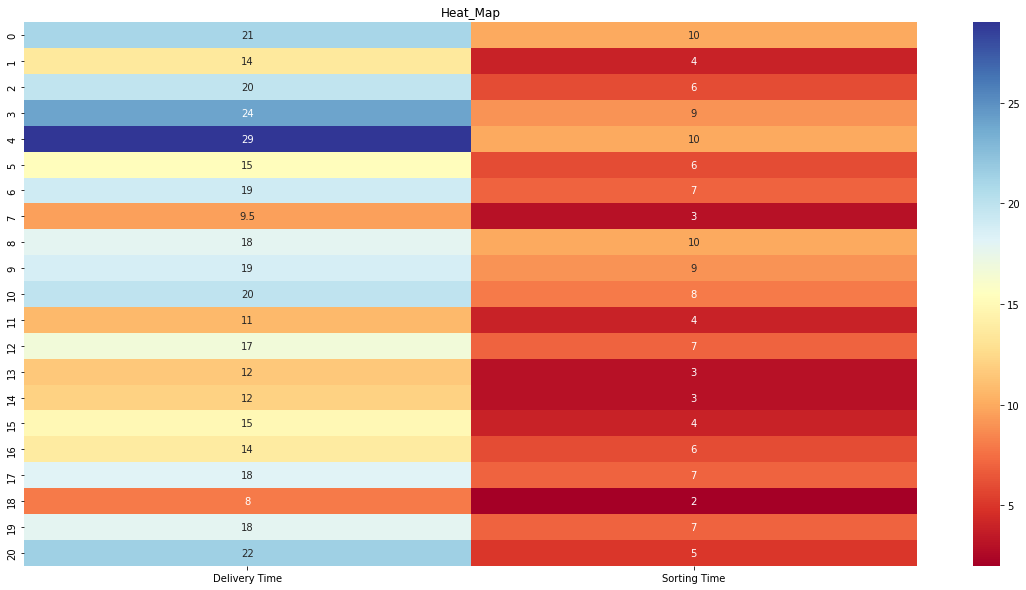

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df1,cmap="RdYlBu",annot=True)
plt.title("Heat_Map")

### Box Plot

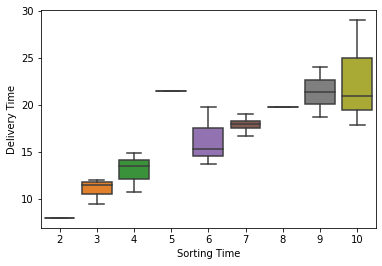

In [6]:
sns.boxplot(x="Sorting Time", y="Delivery Time",data=df1)
plt.show()

### Violin Plot

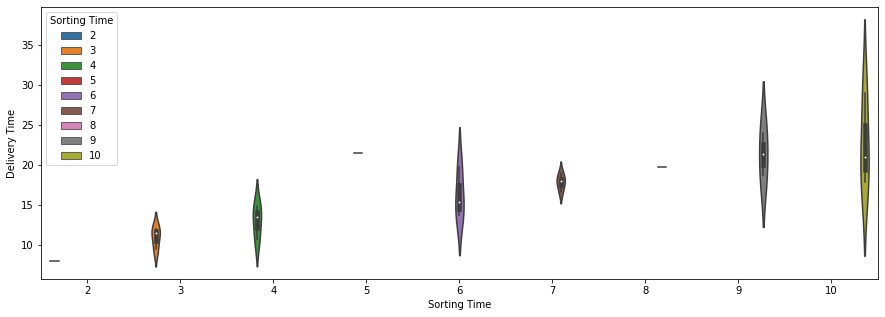

In [7]:
plt.figure(figsize=(15,5))
sns.violinplot(x="Sorting Time", y="Delivery Time",data=df1,hue="Sorting Time")
plt.show()

### Prob Plot

Text(0.5, 1.0, 'Delivery Time')

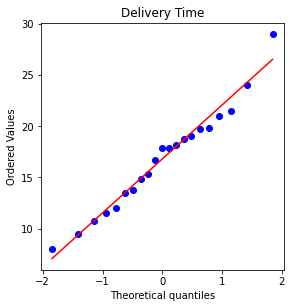

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,4)
probplot(df1["Delivery Time"],plot=plt)
plt.title("Delivery Time")

Text(0.5, 1.0, 'Sorting Time')

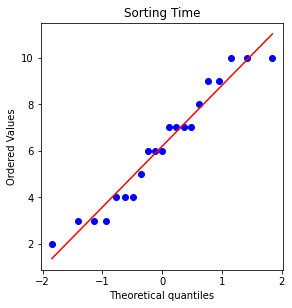

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,4)
probplot(df1["Sorting Time"],plot=plt)
plt.title("Sorting Time")

###  Hypothesis Testing

In [17]:
Ho="Data Is Norma"
Ha="Data Is not Normal"

In [18]:
alpha=0.05
def normality_check(df1):
    for columnName,columnData in df1.iteritems():
        print("Shapiro Test for{columnName}".format(columnName=columnName))
        res=stats.shapiro(columnData)
        print(res)
        
        pValue=round(res[1],2)
        
        if pValue >alpha:
            print("pValue={pValue}>{alpha}. we Failed to reject the Null Hypothesis. {Ho}".format(pValue=pValue,alpha=alpha,Ho=Ho))
        else:
            print("pValue={pValue}<{alpha}. we  reject the Null Hypothesis. {Ha}".format(pValue=pValue,alpha=alpha,Ha=Ha))

normality_check(df1)           

Shapiro Test forDelivery Time
ShapiroResult(statistic=0.9781284928321838, pvalue=0.8963273763656616)
pValue=0.9>0.05. we Failed to reject the Null Hypothesis. Data Is Norma
Shapiro Test forSorting Time
ShapiroResult(statistic=0.9367821216583252, pvalue=0.1881045252084732)
pValue=0.19>0.05. we Failed to reject the Null Hypothesis. Data Is Norma


C:\Users\ROHIT\AppData\Local\Temp\ipykernel_13652\3699574970.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for columnName,columnData in df1.iteritems():


### DistPlot

C:\Users\ROHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

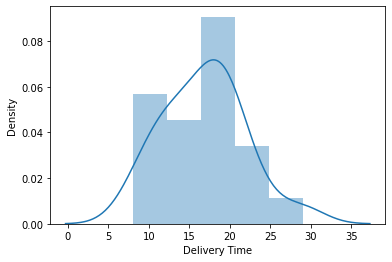

In [8]:
sns.distplot(df1['Delivery Time'])

C:\Users\ROHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

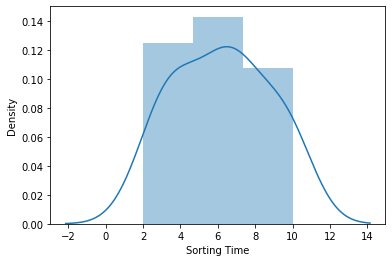

In [9]:
sns.distplot(df1['Sorting Time'])

In [19]:
df1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

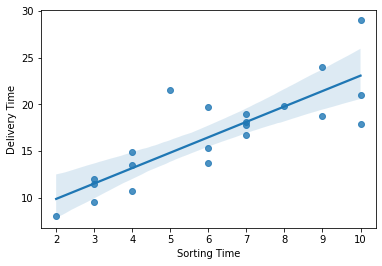

In [10]:
sns.regplot(x= df1['Sorting Time'],y = df1['Delivery Time'])

***

In [21]:
DATA1 =df1.rename({'Delivery Time':'DT', 'Sorting Time':'ST'}, axis=1)
DATA1.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:>

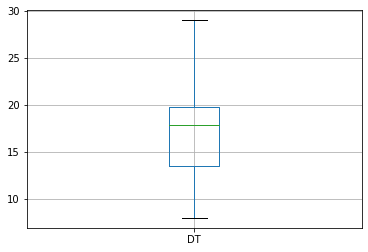

In [24]:
DATA1.boxplot("DT")

<AxesSubplot:>

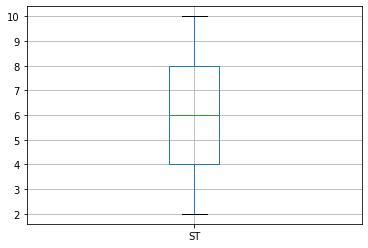

In [23]:
DATA1.boxplot("ST")

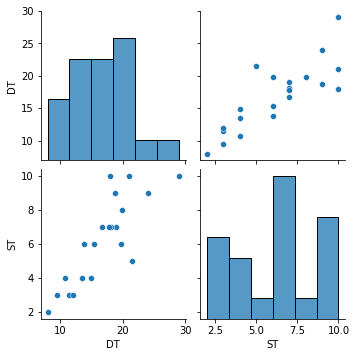

In [26]:
sns.pairplot(DATA1)

In [31]:
model1=smf.ols('DT~ST', data=DATA1).fit()
model1

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        11:11:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model1.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [41]:
model1.tvalues , model1.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [45]:
new_data1=pd.Series([4,8])

In [46]:
data_pred1=pd.DataFrame(new_data1,columns=['ST'])
data_pred1

,ST
0,4
1,8


In [47]:
model1.predict(data_pred1)

0    13.178814
1    19.774893
dtype: float64

In [22]:
df1.rename(columns={"Delivery Time":"DT","Sorting Time":"ST"},inplace=True)

    ST
0   10
1    4
2    6
3    9
4   10
5    6
6    7
7    3
8   10
9    9
10   8
11   4
12   7
13   3
14   3
15   4
16   6
17   7
18   2
19   7
20   5        DT
0   21.00
1   13.50
2   19.75
3   24.00
4   29.00
5   15.35
6   19.00
7    9.50
8   17.90
9   18.75
10  19.83
11  10.75
12  16.68
13  11.50
14  12.03
15  14.88
16  13.75
17  18.11
18   8.00
19  17.83
20  21.50
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        12:31:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             

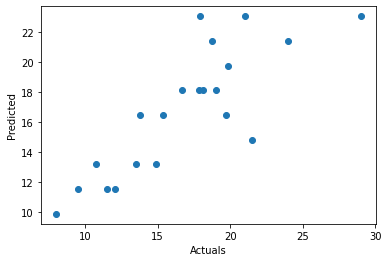

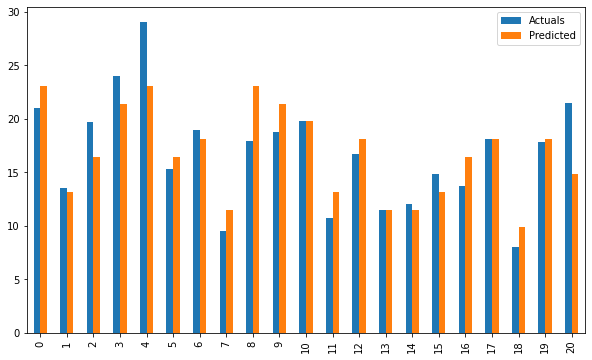

In [23]:
def smf_ols(df1):
    
    x=df1.iloc[:,1:2]
    y=df1.iloc[:,0:1]
    
    print(x,y)
    
    model=smf.ols('y~x',data=df1).fit()
    print(model.summary())
    
    y_pred=model.predict(x)
    print(y,y_pred)
    
    y_lst=y.DT.values.tolist()
    y_pred_lst=y_pred.tolist()
    print(y_lst)
        
    data=[y_lst,y_pred_lst]
    print(data)
    
    res=pd.DataFrame({'Actuals':data[0],"Predicted":data[1]})
    print(res)
    
    plt.scatter(x=res['Actuals'],y=res['Predicted'])
    plt.ylabel('Predicted')
    plt.xlabel('Actuals')
    
    res.plot(kind="bar",figsize=(10,6))

smf_ols(df1[["DT","ST"]])

***

## Q2

In [25]:
df2=pd.read_csv("Salary_Data.csv")
df2.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [26]:
DATA2= df2.rename({'YearsExperience':'EXP'}, axis=1)
DATA2.head(5)

,EXP,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [27]:
DATA2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EXP     30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [28]:
DATA2.describe()

,EXP,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

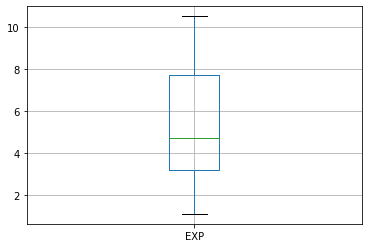

In [29]:
DATA2.boxplot(column="EXP")

<AxesSubplot:>

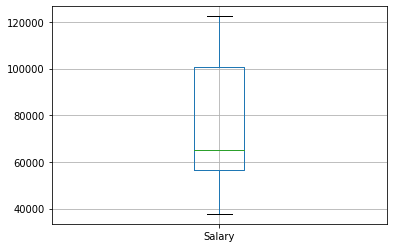

In [30]:
DATA2.boxplot(column="Salary")

C:\Users\ROHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EXP', ylabel='Density'>

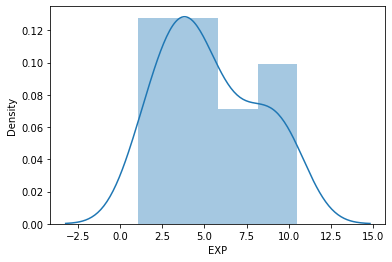

In [31]:
sns.distplot(DATA2["EXP"])

C:\Users\ROHIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

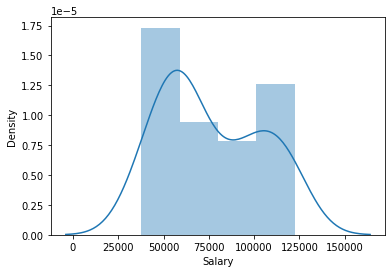

In [32]:
sns.distplot(DATA2["Salary"])

In [33]:
DATA2.corr()

,EXP,Salary
EXP,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='EXP', ylabel='Salary'>

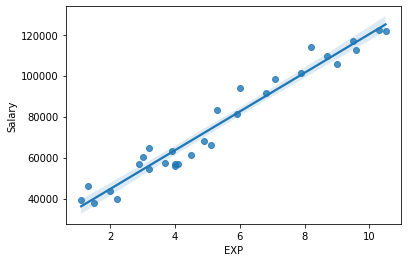

In [34]:
sns.regplot(x=DATA2["EXP"],y=DATA2["Salary"])

In [35]:
model2= smf.ols("Salary~EXP",data=DATA2).fit()
model2

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        12:54:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
EXP         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model2.params

Intercept    25792.200199
EXP           9449.962321
dtype: float64

In [38]:
model2.tvalues , model2.pvalues

(Intercept    11.346940
 EXP          24.950094
 dtype: float64,
 Intercept    5.511950e-12
 EXP          1.143068e-20
 dtype: float64)

In [39]:
model2.rsquared , model2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [40]:
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [41]:
new_data2=pd.Series([2,4])
new_data2

0    2
1    4
dtype: int64

In [42]:
data_pred2=pd.DataFrame(new_data2,columns=['EXP'])
data_pred2

,EXP
0,2
1,4


In [43]:
model2.predict(data_pred2)

0    44692.124842
1    63592.049484
dtype: float64

Salary hike for 2 years Experience is 44692


In [47]:
df2.rename(columns={"YearsExperience":"EXP","Salary":"SAL"},inplace=True)

         SAL
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
10   63218.0
11   55794.0
12   56957.0
13   57081.0
14   61111.0
15   67938.0
16   66029.0
17   83088.0
18   81363.0
19   93940.0
20   91738.0
21   98273.0
22  101302.0
23  113812.0
24  109431.0
25  105582.0
26  116969.0
27  112635.0
28  122391.0
29  121872.0      EXP
0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
5    2.9
6    3.0
7    3.2
8    3.2
9    3.7
10   3.9
11   4.0
12   4.0
13   4.1
14   4.5
15   4.9
16   5.1
17   5.3
18   5.9
19   6.0
20   6.8
21   7.1
22   7.9
23   8.2
24   8.7
25   9.0
26   9.5
27   9.6
28  10.3
29  10.5
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Da

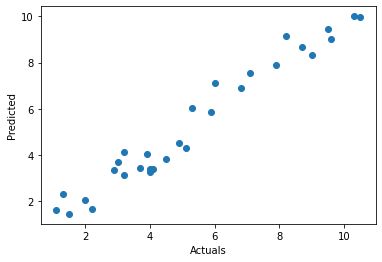

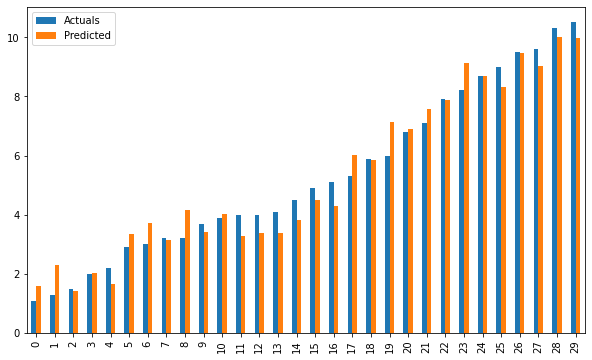

In [49]:
def smf_ols(df2):
    
    x=df2.iloc[:,1:2]
    y=df2.iloc[:,0:1]
    
    print(x,y)
    
    model=smf.ols('y~x',data=df2).fit()
    print(model.summary())
    
    y_pred=model.predict(x)
    print(y,y_pred)
    
    y_lst=y.EXP.values.tolist()
    y_pred_lst=y_pred.tolist()
    print(y_lst)
        
    data=[y_lst,y_pred_lst]
    print(data)
    
    res=pd.DataFrame({'Actuals':data[0],"Predicted":data[1]})
    print(res)
    
    plt.scatter(x=res['Actuals'],y=res['Predicted'])
    plt.ylabel('Predicted')
    plt.xlabel('Actuals')
    
    res.plot(kind="bar",figsize=(10,6))

smf_ols(df2[["EXP","SAL"]])